Dans ce projet, nous disposons d'une base de données issue d'une campagne marketing. L'objectif est de segmenter la clientelle en tenant compte du comportement des individus. Let'go ! 

In [1]:
import pandas as pd

# Charger le fichier 
file_path = "C:/Users/HP PROBOOK/Desktop/Projet clustering/marketing_campaign_clean.csv"

# Charger le dataframe 
data = pd.read_csv(file_path, sep= ";") 

# Afficher les premières lignes 
data.head() 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Prétraitement des données 

In [3]:
# Traitement des valeurs manquantes 
data['Income'] = data['Income'].fillna(data['Income'].mean()) 

In [4]:
# Convertir la colonne Dt_Customer en format datetime avec le bon format
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

# Afficher les premières lignes pour vérifier
print(data[['Dt_Customer']].head())

# Calculer l'ancienneté des clients en jours
current_date = pd.to_datetime('today')
data['Customer_Seniority'] = (current_date - data['Dt_Customer']).dt.days 

# Afficher les premières lignes pour vérifier
print(data[['Dt_Customer', 'Customer_Seniority']].head()) 


  Dt_Customer
0  2012-09-04
1  2014-03-08
2  2013-08-21
3  2014-02-10
4  2014-01-19
  Dt_Customer  Customer_Seniority
0  2012-09-04                4473
1  2014-03-08                3923
2  2013-08-21                4122
3  2014-02-10                3949
4  2014-01-19                3971


In [5]:
# Calculer l'âge des clients 
from datetime import datetime 
current_year = datetime.now().year 
data['Age'] = current_year - data['Year_Birth']

In [6]:
# Encodage des variables catégorielles 
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.compose import ColumnTransformer 

# Définir les colonnes catégorielles et numériques 
categorical_features = ['Education', 'Marital_Status'] 

numeric_features = ['Age', 'Customer_Seniority', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 
                    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 
                    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'] 

# Utiliser ColumnTransformer pour appliquer One-Hot Encoding aux colonnes catégorielles 
preprocessor = ColumnTransformer( 
    transformers=[ 
    ('num', StandardScaler(), numeric_features), 
    ('cat', OneHotEncoder(), categorical_features) ]) 

# Appliquer le preprocessor aux données 
features = preprocessor.fit_transform(data) 

In [7]:
data.head() 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Seniority,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,4473,67
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,3923,70
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,4122,59
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,3949,40
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,3971,43


In [8]:
# Vérifier les transformations 
print("Shape of transformed features:", features.shape) 
print("First few rows of transformed features:\n", features[:5])

Shape of transformed features: (2240, 30)
First few rows of transformed features:
 [[ 9.85344730e-01  1.53118494e+00  2.35326772e-01 -8.25217650e-01
  -9.29894379e-01  3.07039263e-01  9.83781265e-01  1.55157698e+00
   1.67970233e+00  2.46214705e+00  1.47650010e+00  8.43206907e-01
   3.49413941e-01  1.40930394e+00  2.51089024e+00 -5.50784790e-01
   6.93903739e-01  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.23573295e+00 -1.19054458e+00 -2.35826237e-01  1.03255877e+00
   9.06934024e-01 -3.83664176e-01 -8.70479481e-01 -6.36301155e-01
  -7.13225407e-01 -6.50449253e-01 -6.31503178e-01 -7.29005787e-01
  -1.68236342e-01 -1.11040937e+00 -5.68719619e-01 -1.16612540e+00
  -1.30463472e-01  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.000

In [9]:
# Sélection des colonnes pertinentes pour le clustering, y compris l'âge et l'ancienneté 
features = data[['Age', 'Customer_Seniority', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]

# Séparation des données en train et test 

from sklearn.model_selection import train_test_split 

X_train, X_test = train_test_split(features, test_size=0.2, random_state=42)


Utilisation de l'algorithme KMeans pour la segmentation 

In [10]:
# Choix du nombre de cluster avec la méthode Elbow 
# import de KMeans 

from sklearn.cluster import KMeans 

# Calculer l'inertie pour différents nombres de clusters 
inertia = [] 
K_range = range(1, 11) 
for k in K_range: 
    kmeans = KMeans(n_clusters=k, random_state=42) 
    kmeans.fit(features) 
    inertia.append(kmeans.inertia_) 

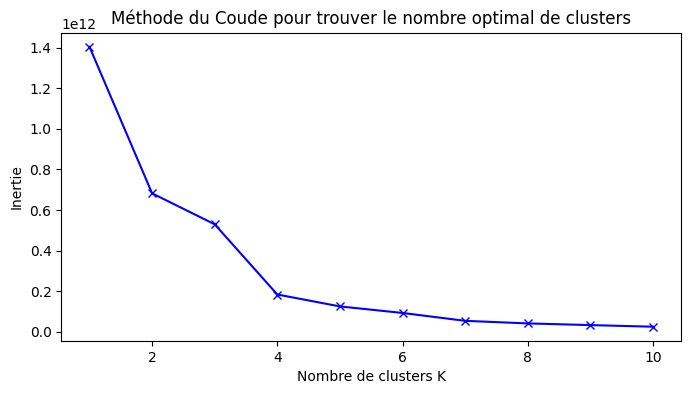

In [11]:
# Traçage du graphique 

import matplotlib.pyplot as plt 
plt.figure(figsize=(8, 4)) 
plt.plot(K_range, inertia, 'bx-') 
plt.xlabel('Nombre de clusters K') 
plt.ylabel('Inertie') 
plt.title('Méthode du Coude pour trouver le nombre optimal de clusters') 
plt.show() 

On déduis d'après le graphique que K=4 serait un choix plus judicieux. 

In [12]:
# Application de K-Means avec 4 clusters sur l'ensemble d'entraînement 
kmeans = KMeans(n_clusters=4, random_state=42) 
kmeans.fit(X_train) 


KMeans(n_clusters=4, random_state=42)

In [13]:
# Prédiction des clusters sur les ensembles d'entraînement et de test 
train_clusters = kmeans.predict(X_train) 
test_clusters = kmeans.predict(X_test) 

In [14]:
# Créer des DataFrames pour analyse ultérieure 
X_train_df = pd.DataFrame(X_train) 
X_train_df['Cluster'] = train_clusters 

X_test_df = pd.DataFrame(X_test) 
X_test_df['Cluster'] = test_clusters 

In [15]:
# Réduire la dimensionnalité à 2 composantes principales 
from sklearn.decomposition import PCA 
pca = PCA(n_components=2) 
principal_components = pca.fit_transform(X_test) 

In [16]:
# Créer un DataFrame avec les composantes principales 
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2']) 
principal_df['Cluster'] = test_clusters 

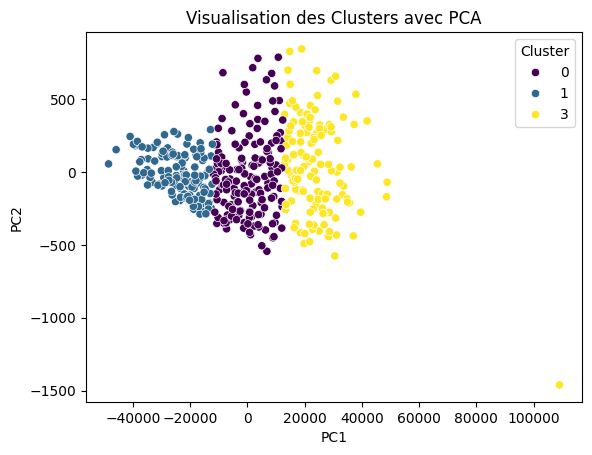

In [17]:
# Visualiser les clusters avec les composantes principales 
import seaborn as sns 
sns.scatterplot(data=principal_df, x='PC1', y='PC2', hue='Cluster', palette='viridis') 
plt.title('Visualisation des Clusters avec PCA') 
plt.show()

In [18]:
 # Calculer la moyenne des caractéristiques pour chaque cluster dans l'ensemble de test 
cluster_profile_kmeans = X_test_df.groupby('Cluster').mean() 
print(cluster_profile_kmeans) 

               Age  Customer_Seniority        Income   Kidhome  Teenhome  \
Cluster                                                                    
0        58.678363         4158.730994  53581.521969  0.368421  0.830409   
1        52.221429         4171.785714  29587.607143  0.728571  0.335714   
3        55.839416         4169.503650  77408.306569  0.094891  0.313869   

           Recency    MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Cluster                                                                       
0        52.198830  332.385965  14.403509       100.736842        22.157895   
1        50.750000   41.671429   5.764286        27.121429        10.007143   
3        52.467153  652.291971  58.576642       389.379562        85.686131   

         MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
Cluster                                                                       
0               15.274854     47.087719           3.204678       

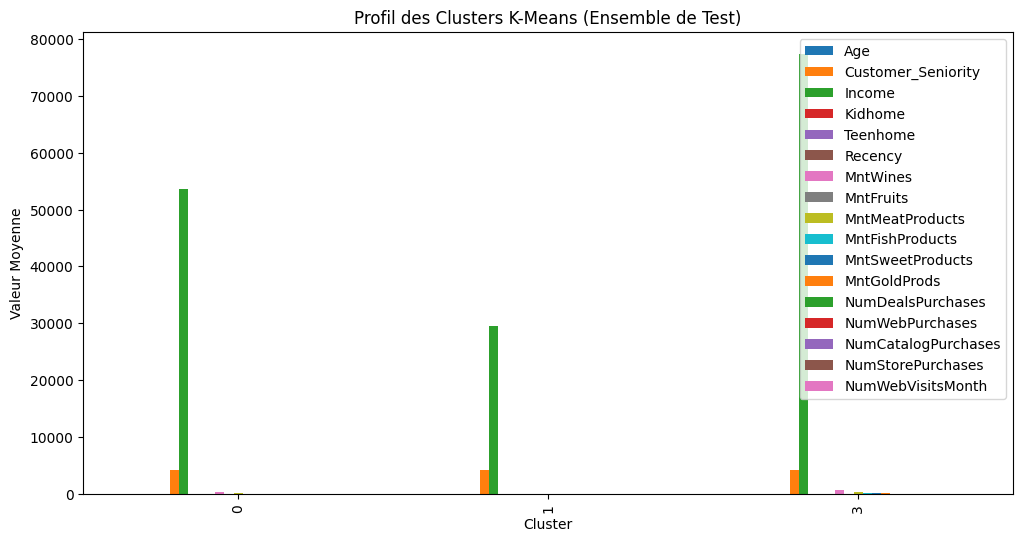

In [19]:
# Visualiser les moyennes de chaque cluster 
cluster_profile_kmeans.plot(kind='bar', figsize=(12, 6)) 
plt.title('Profil des Clusters K-Means (Ensemble de Test)') 
plt.ylabel('Valeur Moyenne') 
plt.xlabel('Cluster') 
plt.show()

Utilisation de l'algorithme CAH 

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import AgglomerativeClustering 

In [21]:
# Calculer la matrice de liaison 
Z = linkage(X_train, method='ward') 

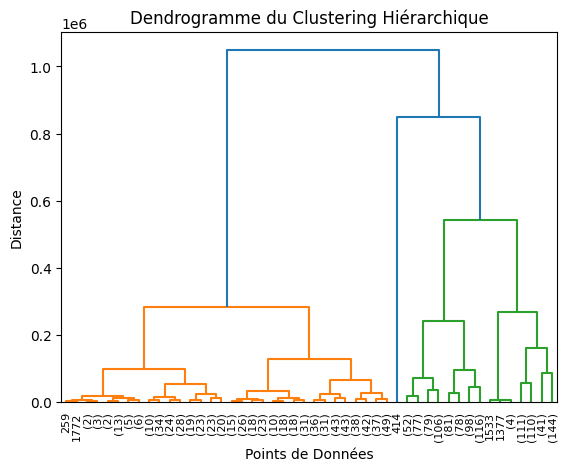

In [22]:
# Tracer le dendrogramme plt.figure(figsize=(10, 7)) 
dendrogram(Z, truncate_mode='level', p=5) 
plt.title('Dendrogramme du Clustering Hiérarchique') 
plt.xlabel('Points de Données') 
plt.ylabel('Distance') 
plt.show() 

In [23]:
# Application de AgglomerativeClustering avec le nombre de clusters optimal déterminé par le dendrogramme 
n_clusters = 3 
# Ajuste ce nombre en fonction du dendrogramme 
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
agg_clusters_train = agg_clustering.fit_predict(X_train) 
agg_clusters_test = agg_clustering.fit_predict(X_test) 

In [24]:
# Créer des DataFrames pour analyse ultérieure 
X_train_df_agg = pd.DataFrame(X_train) 
X_train_df_agg['Cluster'] = agg_clusters_train 

X_test_df_agg = pd.DataFrame(X_test) 
X_test_df_agg['Cluster'] = agg_clusters_test 

In [25]:
# Réduire la dimensionnalité à 2 composantes principales pour Agglomerative Clustering 
pca = PCA(n_components=2) 
principal_components_agg = pca.fit_transform(X_test) 

In [26]:
# Créer un DataFrame avec les composantes principales 
principal_df_agg = pd.DataFrame(data=principal_components_agg, columns=['PC1', 'PC2']) 
principal_df_agg['Cluster'] = agg_clusters_test 

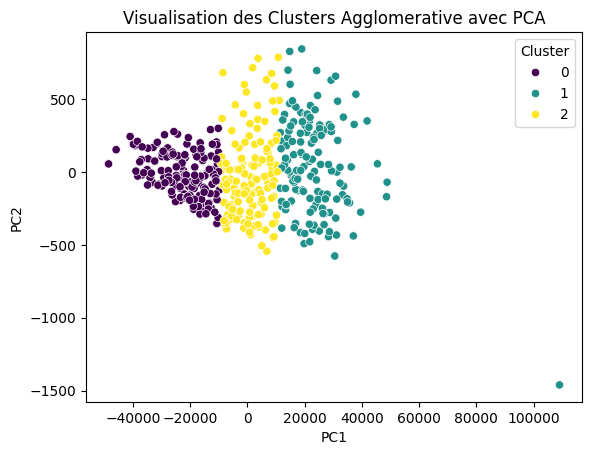

In [27]:
# Visualiser les clusters Agglomerative Clustering avec les composantes principales 
sns.scatterplot(data=principal_df_agg, x='PC1', y='PC2', hue='Cluster', palette='viridis') 
plt.title('Visualisation des Clusters Agglomerative avec PCA') 
plt.show() 

In [28]:
# Calculer la moyenne des caractéristiques pour chaque cluster dans l'ensemble de test 
cluster_profile_agg = X_test_df_agg.groupby('Cluster').mean() 
print(cluster_profile_agg) 

               Age  Customer_Seniority        Income   Kidhome  Teenhome  \
Cluster                                                                    
0        52.490566         4177.874214  31145.389937  0.716981  0.383648   
1        56.013605         4164.816327  76578.115646  0.095238  0.333333   
2        59.260563         4154.260563  54229.177865  0.352113  0.859155   

           Recency    MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Cluster                                                                       
0        50.144654   57.213836   5.855346        29.899371         9.616352   
1        51.476190  643.789116  56.374150       378.877551        84.625850   
2        54.077465  340.154930  14.626761        98.021127        20.845070   

         MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
Cluster                                                                       
0                6.207547     22.547170           2.383648       

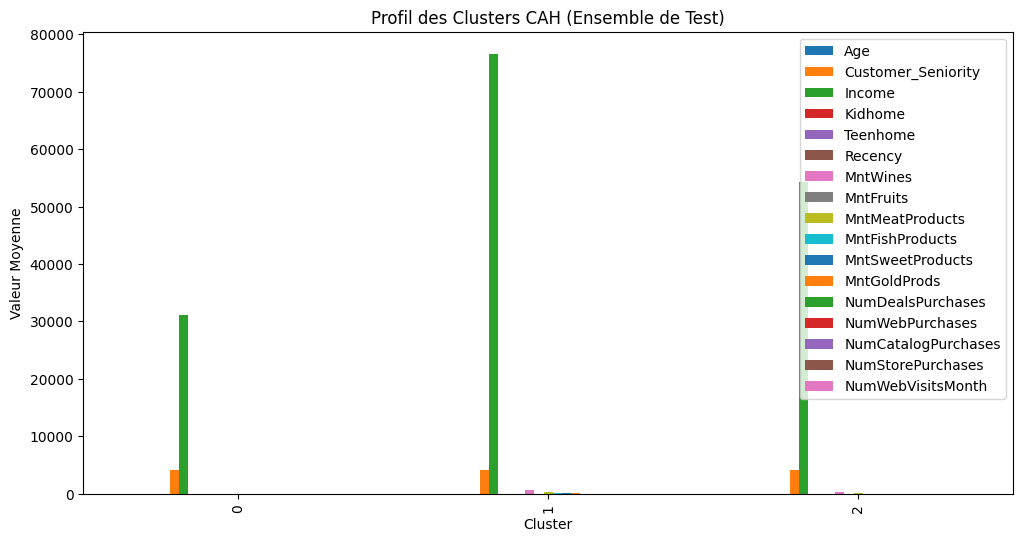

In [29]:
# Visualiser les moyennes de chaque cluster 
cluster_profile_agg.plot(kind='bar', figsize=(12, 6)) 
plt.title('Profil des Clusters CAH (Ensemble de Test)') 
plt.ylabel('Valeur Moyenne') 
plt.xlabel('Cluster') 
plt.show() 

Evaluation des modèles 

Indice de silhouette 

In [30]:
from sklearn.metrics import silhouette_score 

# Calcul de l'indice de silhouette pour K-Means
silhouette_kmeans = silhouette_score(X_test, test_clusters)
print(f'Indice de Silhouette pour K-Means: {silhouette_kmeans}')

# Calcul de l'indice de silhouette pour CAH
silhouette_agg = silhouette_score(X_test, agg_clusters_test)
print(f'Indice de Silhouette pour CAH: {silhouette_agg}')


Indice de Silhouette pour K-Means: 0.5518549972456119
Indice de Silhouette pour CAH: 0.5435529942489229


Coefficient de Davies  

In [31]:
from sklearn.metrics import davies_bouldin_score

# Calcul du coefficient de Davies-Bouldin pour K-Means
davies_bouldin_kmeans = davies_bouldin_score(X_test, test_clusters)
print(f'Coefficient de Davies-Bouldin pour K-Means: {davies_bouldin_kmeans}')

# Calcul du coefficient de Davies-Bouldin pour CAH
davies_bouldin_agg = davies_bouldin_score(X_test, agg_clusters_test)
print(f'Coefficient de Davies-Bouldin pour CAH: {davies_bouldin_agg}')


Coefficient de Davies-Bouldin pour K-Means: 0.5342006690354256
Coefficient de Davies-Bouldin pour CAH: 0.5305383930243419


Inertie pour KMeans 

In [32]:
# L'inertie pour K-Means est accessible directement depuis l'objet kmeans
inertia_kmeans = kmeans.inertia_
print(f'Inertie pour K-Means: {inertia_kmeans}')


Inertie pour K-Means: 150630514780.63623


De tout ce qui précède, nous pouvons choisir KMeans comme modèle adéquat pour notre projet de clustrering. Ainsi, on resume ce qui suit : 

Cluster 0 : Les clients réguliers et équilibrés
Données démographiques :

Âge moyen : 58.7 ans, clientèle plutôt âgée.
Revenu moyen : 53,581 (niveau intermédiaire).
Famille : Faible présence d'enfants ou adolescents (0.37 enfants, 0.83 adolescents en moyenne).
Comportement d'achat :

Dépenses modérées sur les vins (332.38) et viandes (100.73).
Achats réguliers en magasin (6.28) et en ligne (5.06).
Achètent également via catalogues (2.27).
Résumé : Ces clients ont un comportement d'achat équilibré, une bonne fidélité, et un revenu moyen. Ils pourraient répondre positivement à des promotions multicanal ou des programmes de fidélité ciblés.

Cluster 1 : Les clients à revenu limité et moins engagés
Données démographiques :

Âge moyen : 52.2 ans, légèrement plus jeunes.
Revenu moyen : 29,587, le plus faible des trois clusters.
Famille : Plus d'enfants à charge (0.73 enfants, 0.33 adolescents).
Comportement d'achat :

Dépenses faibles sur tous les produits (ex. vins : 41.67, viandes : 27.12).
Achats rares via web (2.38) et catalogues (0.55), plus axés sur les visites en magasin (3.22).
Fréquentes visites sur le site web (6.93 visites par mois), mais faible conversion.
Résumé : Ces clients semblent plus sensibles aux promotions et probablement contraints par un revenu limité. Une stratégie axée sur des offres attractives et des incitations à acheter en ligne pourrait les motiver.

Cluster 3 : Les clients premium et dépensiers
Données démographiques :

Âge moyen : 55.8 ans, clientèle mûre.
Revenu moyen : 77,408, le plus élevé des trois clusters.
Famille : Très peu d'enfants (0.09) ou adolescents (0.31) à charge.
Comportement d'achat :

Dépenses élevées sur toutes les catégories, particulièrement :
Vins (652.29),
Viandes (389.37),
Produits de luxe comme l'or (68.36).
Achats fréquents via catalogues (5.29) et en magasin (8.45).
Moins de visites web (3.23 visites par mois), mais avec des achats réguliers en ligne (5.54).
Résumé : Ces clients représentent le segment haut de gamme, prêts à dépenser pour des produits de qualité. Des campagnes premium, des événements exclusifs ou des clubs VIP pourraient renforcer leur fidélité.

Stratégie Marketing pour chaque cluster :
Cluster 0 (Équilibré) :

Renforcez la fidélité avec des programmes de récompenses.
Proposez des offres cross-canal (web, magasin et catalogues).
Cluster 1 (Limités) :

Campagnes promotionnelles agressives pour les inciter à convertir leurs visites web en achats.
Offres ciblées sur des produits abordables.
Cluster 3 (Premium) :

Proposez des offres exclusives, des abonnements ou des événements privés.
Encouragez davantage de visites web en créant une expérience en ligne enrichie (contenus premium, accès anticipé à de nouveaux produits).
